In [174]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [175]:
data = pd.read_csv('train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


<AxesSubplot:>

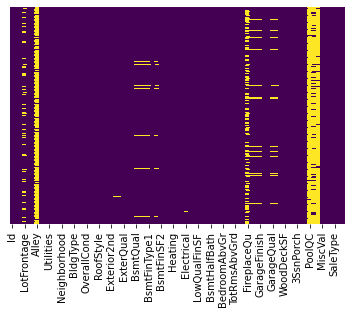

In [176]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [177]:
data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [178]:
print(data['Alley'].isna().sum())
print(data['FireplaceQu'].isna().sum())
print(data['PoolQC'].isna().sum())
print(data['Fence'].isna().sum())
print(data['MiscFeature'].isna().sum())

1369
690
1453
1179
1406


In [179]:
data_copy = data.copy()
data_copy.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [180]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [181]:
data_copy.drop(['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
data_copy.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [182]:
data_copy.shape

(1460, 76)

In [183]:
data_copy['LotFrontage'].fillna(data_copy['LotFrontage'].mean(), inplace=True)

In [184]:
data_copy['BsmtCond'].fillna(data_copy['BsmtCond'].mode()[0], inplace=True)
data_copy['BsmtQual'].fillna(data_copy['BsmtQual'].mode()[0], inplace=True)
data_copy['FireplaceQu'].fillna(data_copy['FireplaceQu'].mode()[0], inplace=True)
data_copy['GarageType'].fillna(data_copy['GarageType'].mode()[0], inplace=True)
data_copy['GarageFinish'].fillna(data_copy['GarageFinish'].mode()[0], inplace=True)
data_copy['GarageQual'].fillna(data_copy['GarageQual'].mode()[0], inplace=True)
data_copy['GarageCond'].fillna(data_copy['GarageCond'].mode()[0], inplace=True)

In [185]:
data_copy.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

<AxesSubplot:>

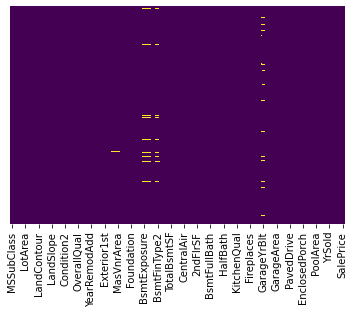

In [186]:
sns.heatmap(data_copy.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [187]:
data_copy['BsmtFinType2'].fillna(data_copy['BsmtFinType2'].mode()[0], inplace=True)
data_copy['BsmtExposure'].fillna(data_copy['BsmtExposure'].mode()[0], inplace=True)
data_copy['GarageYrBlt'].fillna(data_copy['GarageYrBlt'].mode()[0], inplace=True)
data_copy['MasVnrArea'].fillna(data_copy['MasVnrArea'].mean(), inplace=True)

In [188]:
data_copy.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

<AxesSubplot:>

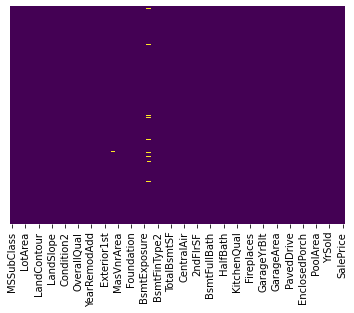

In [189]:
sns.heatmap(data_copy.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [190]:
data_copy.shape

(1460, 76)

In [191]:
data_copy.dropna(inplace=True)

In [192]:
data_copy.shape

(1414, 76)

In [193]:
LE = LabelEncoder()
catFeatures = data_copy.select_dtypes(include='object').columns
print(catFeatures)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [194]:
for i in catFeatures:
    data_copy[i] = LE.fit_transform(data_copy[i])
data_copy.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


In [195]:
df = data_copy.iloc[:, :-1]
mm = MinMaxScaler()
df[:] = mm.fit_transform(df[:])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.235294,0.75,0.150685,0.033420,1.0,1.0,1.0,0.0,1.0,0.0,...,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,1.0,0.8
1,0.000000,0.75,0.202055,0.038795,1.0,1.0,1.0,0.0,0.5,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,1.0,0.8
2,0.235294,0.75,0.160959,0.046507,1.0,0.0,1.0,0.0,1.0,0.0,...,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,1.0,0.8
3,0.294118,0.75,0.133562,0.038561,1.0,0.0,1.0,0.0,0.0,0.0,...,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,1.0,0.0
4,0.235294,0.75,0.215753,0.060576,1.0,0.0,1.0,0.0,0.5,0.0,...,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,1.0,0.8


In [196]:
X = df.values
y = data_copy['SalePrice'].values
print(X.shape, y.shape)

(1414, 75) (1414,)


In [197]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, random_state=1)

In [198]:
class LinRegModel(nn.Module):
    def __init__(self):
        super(LinRegModel, self).__init__()
        self.layer1 = nn.Linear(75, 30)
        self.layer2 = nn.Linear(30, 30)
        self.out = nn.Linear(30, 1)
    
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.out(x)
        return x 

model = LinRegModel()

In [199]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0818,  0.0924,  0.0851,  ...,  0.0791,  0.0596, -0.0225],
         [-0.0476, -0.0327,  0.0614,  ...,  0.0652,  0.0735,  0.0834],
         [-0.0947, -0.0178,  0.0772,  ...,  0.0499,  0.0404,  0.0916],
         ...,
         [ 0.0227,  0.0801,  0.0711,  ...,  0.0422, -0.0617, -0.0340],
         [ 0.0137,  0.0369, -0.0680,  ...,  0.0460,  0.0365, -0.0075],
         [ 0.0868, -0.0300,  0.0737,  ...,  0.0848, -0.0290, -0.0436]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0542, -0.0645, -0.0717, -0.0769, -0.0054, -0.0296,  0.0738,  0.1044,
         -0.0111,  0.0154,  0.0989, -0.0640,  0.1126,  0.0450, -0.0222, -0.0833,
          0.0565,  0.0114,  0.0886,  0.0328, -0.1091, -0.0420,  0.0152,  0.0992,
          0.0136,  0.1137,  0.0672, -0.0866, -0.0004, -0.0887],
        requires_grad=True),
 Parameter containing:
 tensor([[-0.0047,  0.0090,  0.0688, -0.0007,  0.0384,  0.0792,  0.0242,  0.1428,
          -0.1721, -0.1752,  0.0203,  0.039

In [200]:
X_train

array([[0.35294118, 0.75      , 0.16797931, ..., 0.75      , 1.        ,
        0.8       ],
       [0.29411765, 0.75      , 0.14383562, ..., 0.5       , 1.        ,
        0.8       ],
       [0.58823529, 1.        , 0.07876712, ..., 0.25      , 1.        ,
        0.6       ],
       ...,
       [0.23529412, 0.75      , 0.20205479, ..., 0.75      , 1.        ,
        0.8       ],
       [0.17647059, 1.        , 0.14383562, ..., 0.        , 1.        ,
        0.8       ],
       [0.17647059, 1.        , 0.09931507, ..., 0.75      , 1.        ,
        0.8       ]])

In [201]:
y_train

array([173000, 177000, 235000, 236000, 207500, 186000, 289000, 167000,
       160000, 745000, 290000, 187000, 555000, 309000, 164500, 110500,
       412500, 155000, 582933, 130000, 217500, 120000, 222000, 155000,
       392000, 162000, 173000, 158900, 178400, 274970, 178000, 287000,
       232000, 183000, 151400, 205000, 290000, 170000, 131000, 150000,
       281000, 270000, 180500, 151000, 139000, 173000, 162000, 214000,
       125000, 556581, 139000, 103200, 230000, 395000,  86000, 299800,
       219500, 129500, 150900, 290000, 187500, 215000, 301000, 164900,
       112000, 153900,  80000, 168000, 274000, 165000, 115000, 290000,
       187750, 255500, 160000, 128500, 150000, 171000, 142000, 125500,
        88000, 111250, 141000, 240000, 171900, 163000, 136905, 204000,
       120500, 147000, 128500,  94500, 230000, 235000, 178000,  79500,
       112000, 139000,  91300, 250000, 129500, 119500, 214500, 245350,
       128900, 159000, 142600, 162900, 144000,  99500, 162900, 213000,
      

In [202]:
X_train = torch.tensor(X_train).type(torch.float32)
y_train = torch.tensor(y_train).type(torch.float32)
X_val = torch.tensor(X_val).type(torch.float32)
y_val = torch.tensor(y_val).type(torch.float32)

In [203]:
lr = 0.01
num_epochs = 10
checkpoint_path = 'best_acc.pth'
best_val_loss = float('inf')

In [204]:
optimizer = opt.Adam(model.parameters(), lr=lr)
criterion = nn.MSELoss()

In [205]:
def train(model, X_train, y_train, optimizer, criterion):
    epoch_loss = 0.0
    
    model.train()
    for x, target in zip(X_train, y_train):
        optimizer.zero_grad()
        output = model(x)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        epoch_loss += loss
    
    epoch_loss = epoch_loss/len(X_train)
    return epoch_loss

In [206]:
def evaluate(model, X_val, y_val, criterion):
    epoch_loss = 0.0
    
    model.eval()
    with torch.no_grad():
        for x, target in zip(X_val, y_val):
            output = model(x)
            loss = criterion(output, target)
            epoch_loss += loss
        
    epoch_loss = epoch_loss/len(X_val)
    return epoch_loss

In [210]:
for epoch in range(num_epochs):
    
    train_loss = train(model, X_train, y_train, optimizer, criterion)
    valid_loss = evaluate(model, X_val, y_val, criterion)
    
    if valid_loss < best_val_loss:
        print(f'Valid loss improved to {valid_loss:.3f}') 
        valid_loss = best_val_loss
        torch.save(model.state_dict(), checkpoint_path)
    
    data_str = f'Epoch: {epoch+1:02}'
    data_str += f' Train Loss: {train_loss:.3f}'
    print(data_str)

Valid loss improved to 755664128.000
Epoch: 01 Train Loss: 1211584384.000
Valid loss improved to 753132928.000
Epoch: 02 Train Loss: 1207068672.000
Valid loss improved to 751136256.000
Epoch: 03 Train Loss: 1202512256.000
Valid loss improved to 749121920.000
Epoch: 04 Train Loss: 1198173056.000
Valid loss improved to 747079424.000
Epoch: 05 Train Loss: 1193904896.000
Valid loss improved to 745225664.000
Epoch: 06 Train Loss: 1189643648.000
Valid loss improved to 743339520.000
Epoch: 07 Train Loss: 1185534592.000
Valid loss improved to 741684544.000
Epoch: 08 Train Loss: 1181407232.000
Valid loss improved to 740674816.000
Epoch: 09 Train Loss: 1177515648.000
Valid loss improved to 738811584.000
Epoch: 10 Train Loss: 1173942144.000
